## Importation des librairies

In [51]:
import argparse

import yaml #type: ignore
import joblib #type: ignore
import pandas as pd #type: ignore
from sklearn.metrics import accuracy_score #type: ignore
from sklearn.tree import DecisionTreeClassifier #type: ignore
from sklearn.ensemble import RandomForestClassifier #type: ignore
from sklearn.linear_model import LogisticRegression #type: ignore
from sklearn.model_selection import train_test_split #type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [4]:
df = pd.read_csv("../data/processed/new_training.csv")
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,37
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,39


In [5]:
df.shape

(4920, 132)

In [6]:
columns = df.columns
columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

In [7]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,20.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


## Analyse EDA

### Traitement des données

#### Valeurs manquantes

In [8]:
df.isnull().sum().sum()

0

#### Valeurs aberrantes

In [30]:
def boxplot(data, columns):
    plt.rcParams["figure.figsize"] = [13.50, 7.50]
    plt.rcParams["figure.autolayout"] = True
    
    # Créer une figure avec 2 lignes et 4 colonnes de sous-graphiques
    figure, axis = plt.subplots(2, 4)
    
    index = 0
    for i in range(2):  # Boucle sur les lignes
        for j in range(4):  # Boucle sur les colonnes
            if index < len(columns):  # Vérifie qu'il reste des colonnes à afficher
                data[columns[index]].plot.box(title=columns[index], ax=axis[i][j], color="MEDIUMVIOLETRED")
                index += 1
    plt.show()

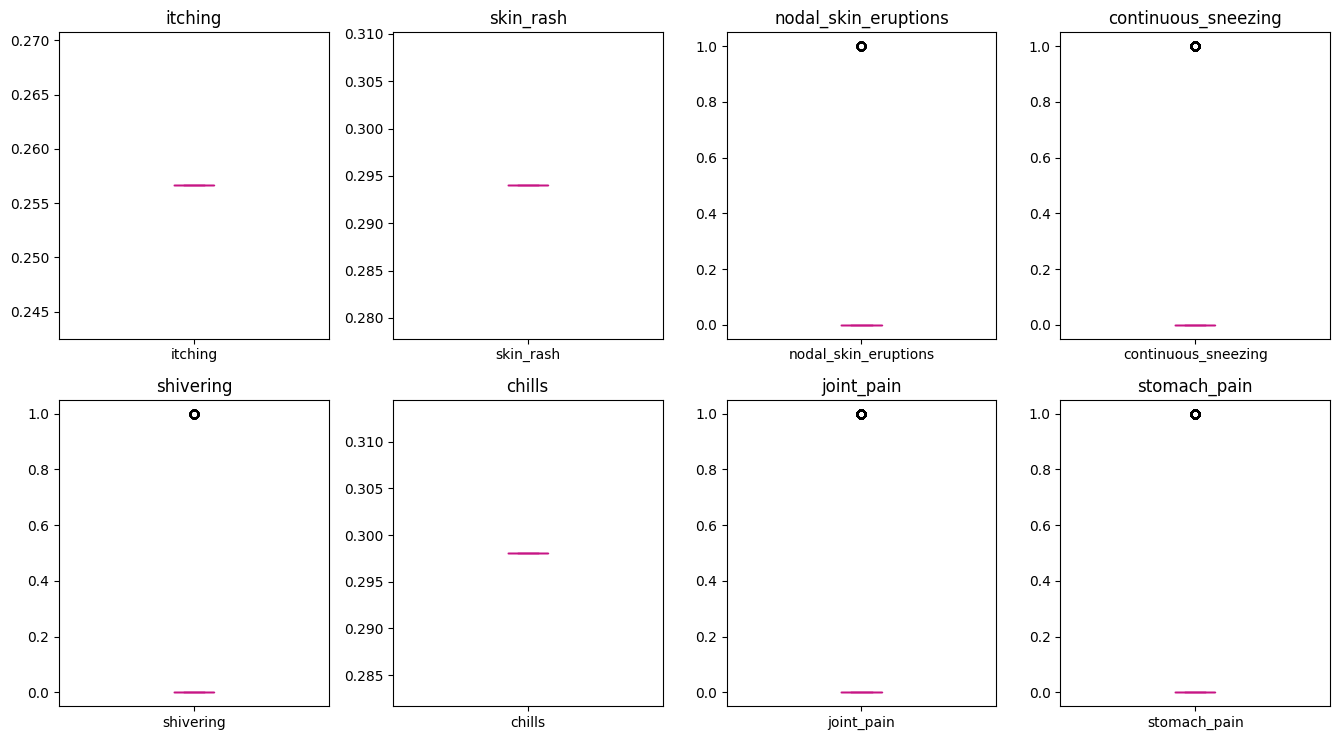

In [31]:
boxplot(df, ["itching",	"skin_rash","nodal_skin_eruptions",	"continuous_sneezing",	"shivering",	"chills",	"joint_pain",	"stomach_pain"])

In [10]:
def valeur_aberrant(columns :str):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    df.loc[df[columns]<=lower_limit,columns] = np.mean(df[columns])
    df.loc[df[columns]>upper_limit, columns] = np.mean(df[columns])

In [11]:
valeur_aberrant("itching")

C:\Users\brice\AppData\Local\Temp\ipykernel_2736\672958488.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1378048780487805' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[columns]<=lower_limit,columns] = np.mean(df[columns])


In [12]:
valeur_aberrant("skin_rash")

C:\Users\brice\AppData\Local\Temp\ipykernel_2736\672958488.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1597560975609756' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[columns]<=lower_limit,columns] = np.mean(df[columns])


In [13]:
valeur_aberrant("chills")

C:\Users\brice\AppData\Local\Temp\ipykernel_2736\672958488.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.16219512195121952' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[columns]<=lower_limit,columns] = np.mean(df[columns])


#### Histogramme


In [28]:
def hist(data, columns):
    plt.rcParams["figure.figsize"] = [13.50, 7.50]
    plt.rcParams["figure.autolayout"] = True
    
    # Créer une figure avec 2 lignes et 4 colonnes de sous-graphiques
    figure, axis = plt.subplots(2, 4)
    
    index = 0
    for i in range(2):  # Boucle sur les lignes
        for j in range(4):  # Boucle sur les colonnes
            if index < len(columns):  # Vérifie qu'il reste des colonnes à afficher
                data[columns[index]].plot.hist(title=columns[index], ax=axis[i][j], color="MEDIUMVIOLETRED")
                index += 1
    plt.show()

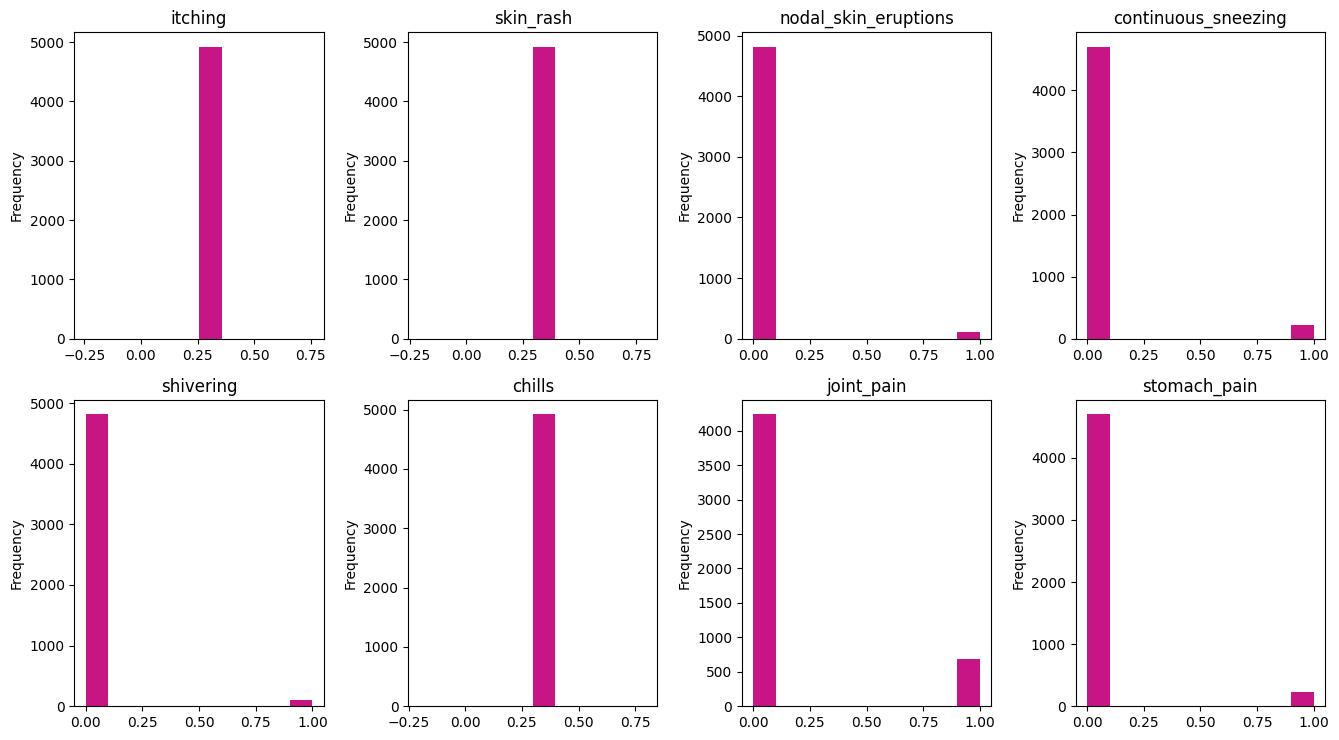

In [29]:
hist(df, ["itching",	"skin_rash","nodal_skin_eruptions",	"continuous_sneezing",	"shivering",	"chills",	"joint_pain",	"stomach_pain"])

#### Heatmap

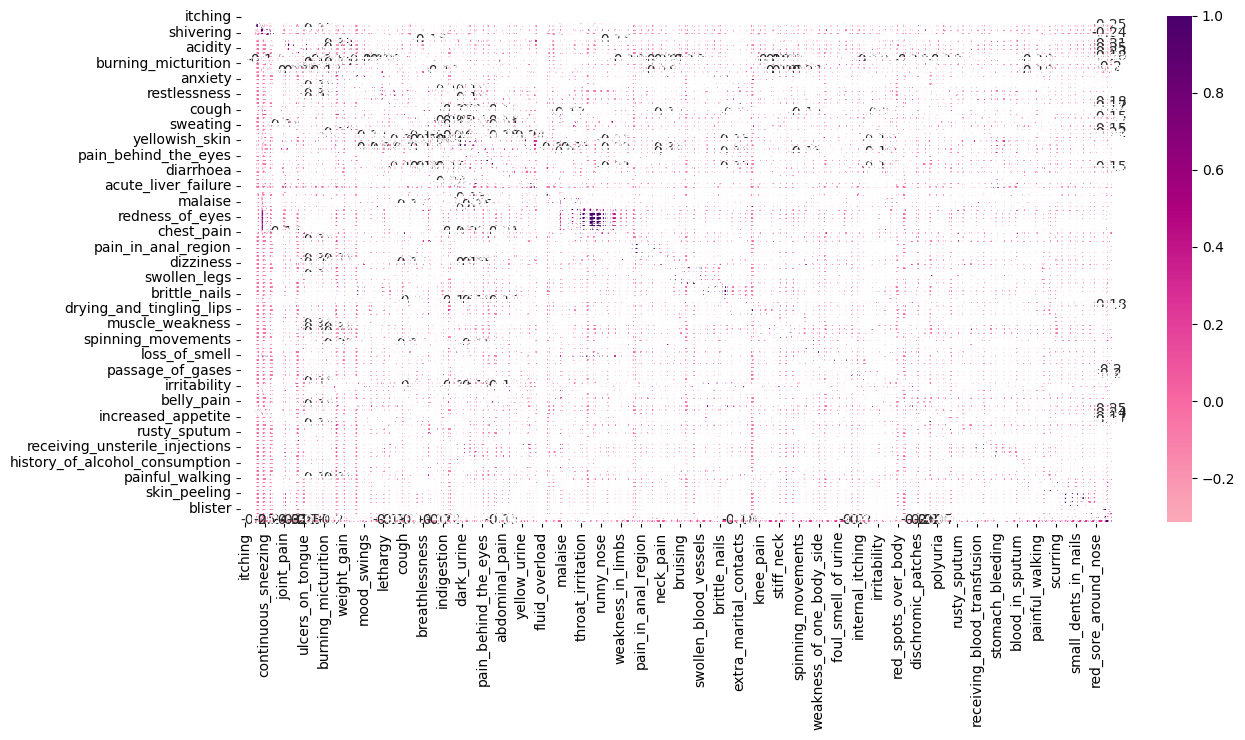

In [34]:
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True, center=0)

## Entrainement

In [35]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=42)

In [37]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)

In [40]:
dtc.fit(X_train, Y_train)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### Prédiction

In [41]:
Y_pred_tree = dtc.predict(X_test)

In [47]:
Y_pred_random = rfc.predict(X_test)

### Métrique

In [49]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_tree)
print("-"*70)
print("Métrique")
print("-"*70)
print("Confusion Matrix Decision tree:")
print(str(confusion_matrix))
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred_tree))
print("-"*70)

----------------------------------------------------------------------
Métrique
----------------------------------------------------------------------
Confusion Matrix Decision tree:
[[19  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy confusion matrix: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        33
          10       1.00      1.00

In [50]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_random)
print("-"*70)
print("Métrique")
print("-"*70)
print("Confusion Matrix Random Forest:")
print(str(confusion_matrix))
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred_tree))
print("-"*70)

----------------------------------------------------------------------
Métrique
----------------------------------------------------------------------
Confusion Matrix Random Forest:
[[19  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy confusion matrix: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        33
          10       1.00      1.00

### Enregistrement des modèles


In [52]:
pickle.dump(dtc, open('decision_tree_model.pkl','wb'))
pickle.dump(rfc, open('random_forest_model.pkl','wb'))